In [143]:
DATA_DIR = '../data'

In [288]:
import pandas as pd

data = pd.read_csv('{}/train.csv'.format(DATA_DIR))
print('Number of rows: {}'.format(len(data)))
data.head(n=10)

Number of rows: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [289]:
# Drop columns that do not contain useful information
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis='columns')

# Make gender data numeric
data.loc[data['Sex'] == 'female', 'Sex'] = 0.0
data.loc[data['Sex'] == 'male', 'Sex'] = 1.0
data['Sex'] = data['Sex'].apply(pd.to_numeric)

# Keep only the first letter from the cabin data and make it numeric (A->1, B->2, ...,  no entry->0)
data['Cabin'] = [x[0] if not pd.isna(x) else 0 for x in data['Cabin']]
data['Cabin'] = [ord(x) - 64 if not x == 0 else 0 for x in data['Cabin']]
data['Cabin'] = data['Cabin'].apply(pd.to_numeric)

# Make data in Embarked column numeric
ports = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked'] = [ports[x] if x in ports else len(ports) for x in data['Embarked']]
data['Embarked'] = data['Embarked'].apply(pd.to_numeric)

In [290]:
data.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0,2
1,1,1,0.0,38.0,1,0,71.2833,3,0
2,1,3,0.0,26.0,0,0,7.9250,0,2
3,1,1,0.0,35.0,1,0,53.1000,3,2
4,0,3,1.0,35.0,0,0,8.0500,0,2
5,0,3,1.0,NaN,0,0,8.4583,0,1
6,0,1,1.0,54.0,0,0,51.8625,5,2
7,0,3,1.0,2.0,3,1,21.0750,0,2
8,1,3,0.0,27.0,0,2,11.1333,0,2
9,1,2,0.0,14.0,1,0,30.0708,0,0


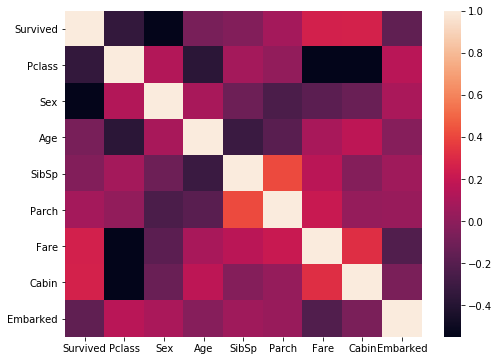

In [291]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sn.heatmap(data.corr())

In [292]:
target = data['Survived']
features = data.drop('Survived', axis='columns')

In [293]:
# Replace NaN's in Age column by the average age

features.loc[pd.isna(features['Age']), 'Age'] = features['Age'].mean()
features.head(n=10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1.0,22.000000,1,0,7.2500,0,2
1,1,0.0,38.000000,1,0,71.2833,3,0
2,3,0.0,26.000000,0,0,7.9250,0,2
3,1,0.0,35.000000,1,0,53.1000,3,2
4,3,1.0,35.000000,0,0,8.0500,0,2
5,3,1.0,29.699118,0,0,8.4583,0,1
6,1,1.0,54.000000,0,0,51.8625,5,2
7,3,1.0,2.000000,3,1,21.0750,0,2
8,3,0.0,27.000000,0,2,11.1333,0,2
9,2,0.0,14.000000,1,0,30.0708,0,0


In [294]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
print(list(scaler.data_min_))
print(list(scaler.data_max_))

norm_features = scaler.transform(features)

[1.0, 0.0, 0.42, 0.0, 0.0, 0.0, 0.0, 0.0]
[3.0, 1.0, 80.0, 8.0, 6.0, 512.3292, 20.0, 3.0]


In [295]:
norm_features_df = pd.DataFrame(data=norm_features, columns=features.columns)
norm_features_df.head(n=10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.00,0.666667
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.15,0.000000
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.00,0.666667
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.15,0.666667
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.00,0.666667
5,1.0,1.0,0.367921,0.000,0.000000,0.016510,0.00,0.333333
6,0.0,1.0,0.673285,0.000,0.000000,0.101229,0.25,0.666667
7,1.0,1.0,0.019854,0.375,0.166667,0.041136,0.00,0.666667
8,1.0,0.0,0.334004,0.000,0.333333,0.021731,0.00,0.666667
9,0.5,0.0,0.170646,0.125,0.000000,0.058694,0.00,0.000000


In [296]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

lg = linear_model.LogisticRegression()
scores = cross_val_score(lg, norm_features, target, cv=10)
print('Mean score: {:.2f}%'.format(scores.mean()*100))

Mean score: 79.46%


In [302]:
from sklearn import svm

svm = svm.SVC(kernel='poly')
scores = cross_val_score(svm, norm_features, target, cv=10)
print('Mean score: {:.2f}%'.format(scores.mean()*100))

Mean score: 81.37%


In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, norm_features, target, cv=10)
print('Mean score: {:.2f}%'.format(scores.mean()*100))

Mean score: 80.59%
